In [8]:
import numpy as np
import h5py 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#load parameters and fields
with h5py.File('coord_ana.h5','r') as anafile:
    phi=np.array(anafile['density_field'])
    delta_mc_phi=np.array(anafile['density_field'].attrs["DeltaMC"])
    MSD=np.array(anafile['MSD'])


with h5py.File('coord.h5', 'r') as f:
    ##number of beads per polymer
    N=int(f['parameter/reference_Nbeads'][()]) 
    ##number of polymers
    n_polym=int(f['parameter/n_polymers'][()]) 
    n_poly_type=int(f['parameter/n_poly_type'][()]) 
    ##box dimensions 
    lxyz=np.array(f['parameter/lxyz'])
    ##box discretization
    nxyz=np.array(f['parameter/nxyz'])


#bead density
rho=n_polym * N / (np.prod(lxyz))

# external field velocity in R_e/MC_step
vref=(lxyz[1]/nxyz[1])/10000

Text(0.5, 1.0, 'Density of polymer type A')

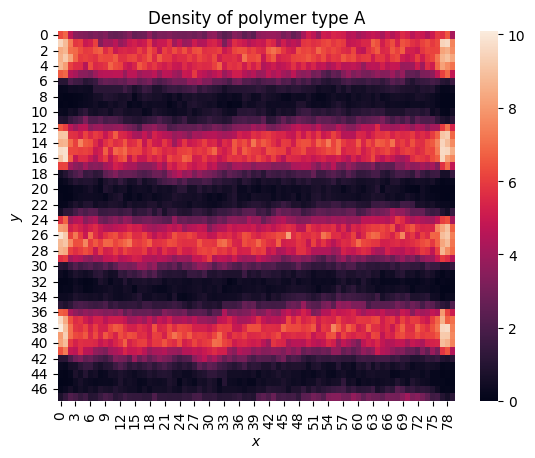

In [43]:
#get density profile average over z
phi_av=phi.mean(axis=4)


def plot_heatmap(t,phi_av,type=0):
    return sns.heatmap(data=phi_av[t,type,:,:].T)
s=plot_heatmap(0,phi_av)
s.set_xlabel("$x$")
s.set_ylabel("$y$")
s.set_title("Density of polymer type A")